<a href="https://colab.research.google.com/github/Nagawade/ML-Projects/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
!ls'https://drive.google.com/file/d/1r-rvIeINdNguA4r5D7Pc6ItdIPpWAx8U/view?usp=drive_link'

/bin/bash: line 1: lshttps://drive.google.com/file/d/1r-rvIeINdNguA4r5D7Pc6ItdIPpWAx8U/view?usp=drive_link: No such file or directory


In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [119]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [120]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


**Insights**

1.The data is completely cleaned

2.There are no null values present in data

# Exploratory Data Analysis (EDA)

In [121]:
numeric=[]
categorical=[]
for i in df:
  if df[i].dtype == 'object':
    categorical.append(i)
  else:
    numeric.append(i)


In [122]:
numeric

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [123]:
categorical

['Surname', 'Geography', 'Gender']

<Axes: xlabel='Geography', ylabel='count'>

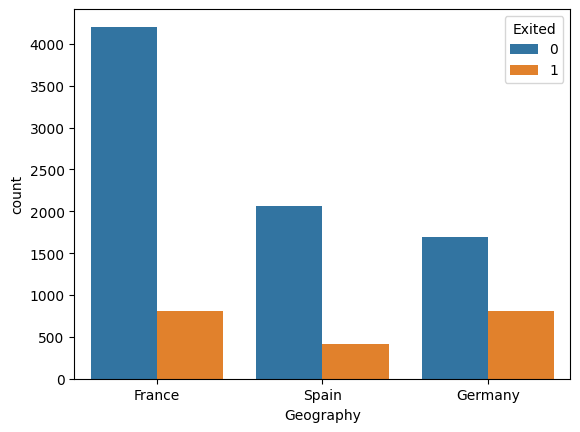

In [124]:
sns.countplot(x=df['Geography'],hue=df['Exited'])

<Axes: xlabel='Gender', ylabel='count'>

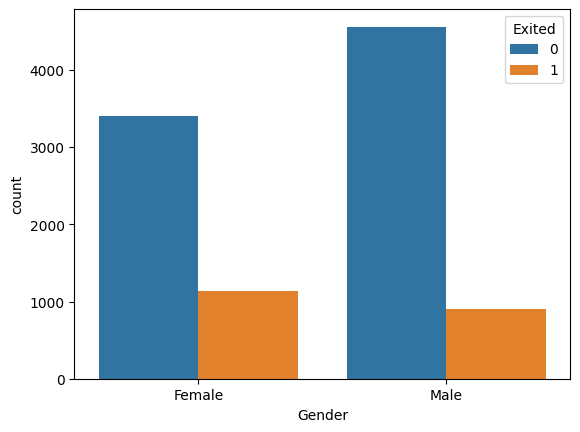

In [125]:
sns.countplot(x=df['Gender'],hue=df['Exited'])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

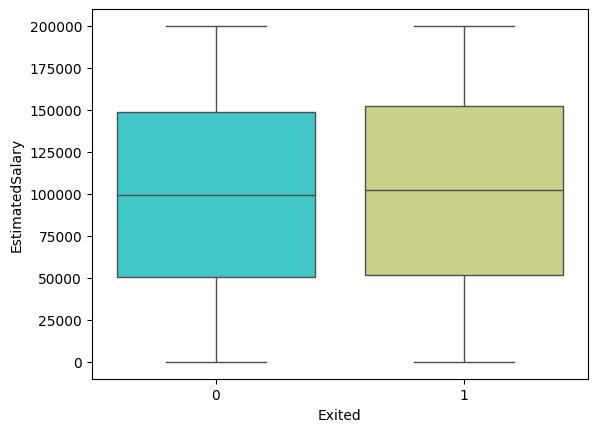

In [126]:
sns.boxplot(x=df['Exited'],y=df['EstimatedSalary'],palette='rainbow')

<Axes: xlabel='Geography', ylabel='EstimatedSalary'>

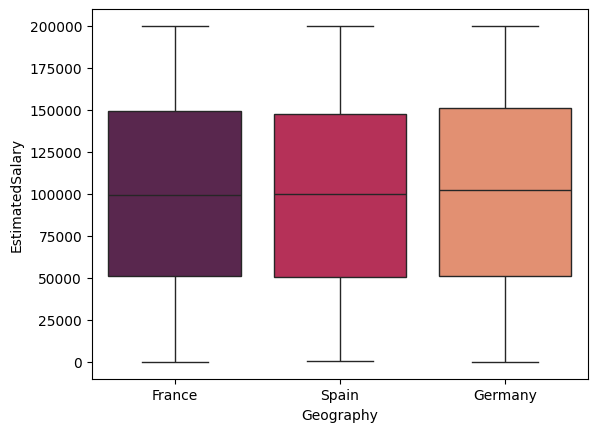

In [127]:
sns.boxplot(x=df['Geography'],y=df['EstimatedSalary'],palette='rocket')

<Axes: xlabel='Geography', ylabel='EstimatedSalary'>

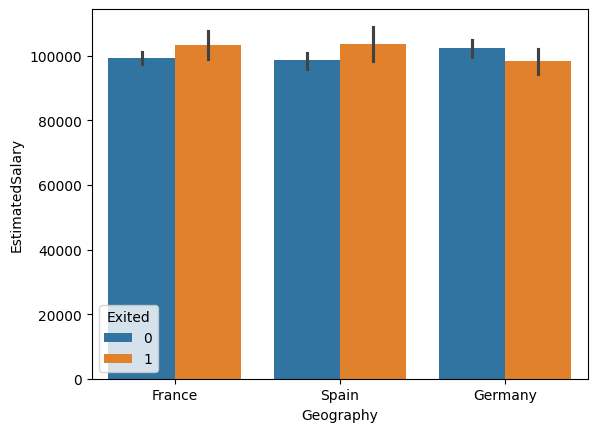

In [128]:
sns.barplot(x=df['Geography'],y=df['EstimatedSalary'],hue=df['Exited'])

<Axes: xlabel='Geography', ylabel='EstimatedSalary'>

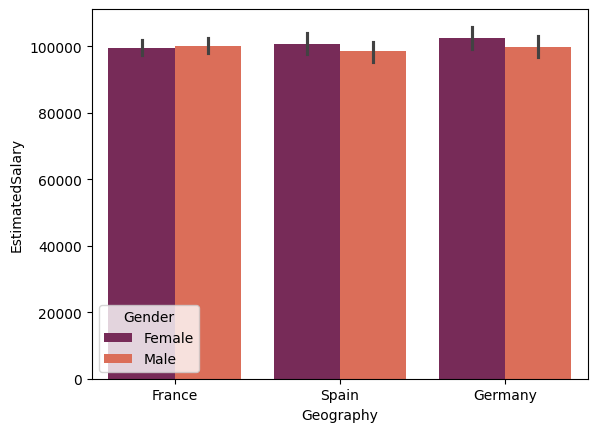

In [129]:
sns.barplot(x=df['Geography'],y=df['EstimatedSalary'],hue=df['Gender'],palette='rocket')

<Axes: xlabel='Balance', ylabel='Density'>

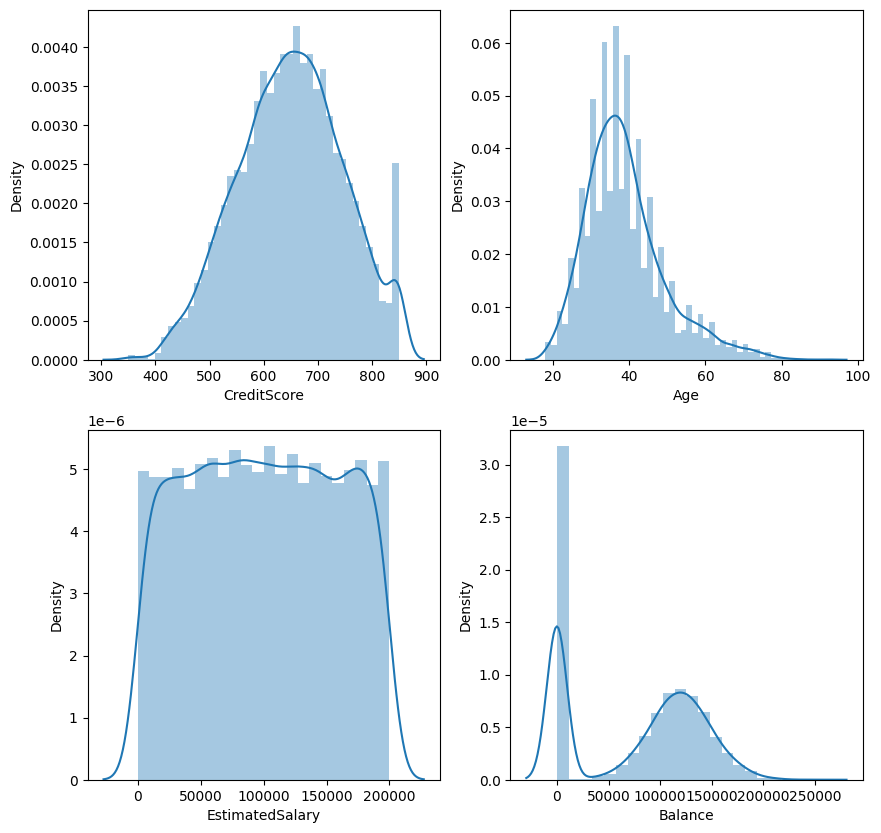

In [130]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.distplot(df['CreditScore'],ax=ax[0,0])
sns.distplot(df['Age'],ax=ax[0,1])
sns.distplot(df['EstimatedSalary'],ax=ax[1,0])
sns.distplot(df['Balance'],ax=ax[1,1])

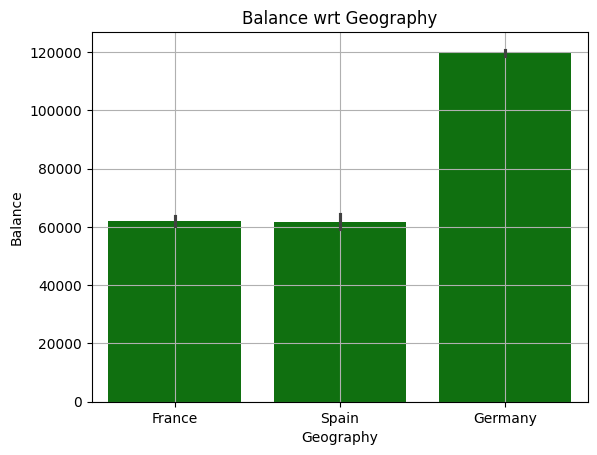

In [131]:
sns.barplot(x=df['Geography'],y=df['Balance'],color='green')
plt.xlabel('Geography')
plt.ylabel('Balance')
plt.grid(True)
plt.title('Balance wrt Geography')
plt.show()

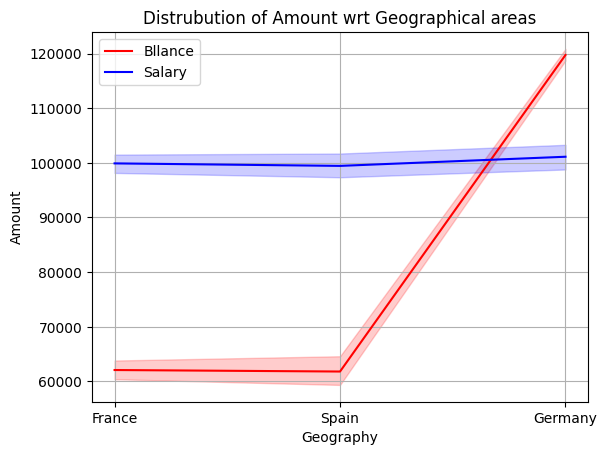

In [132]:
sns.lineplot(x=df['Geography'],y=df['Balance'],color='red',markers='o',label='Bllance')
sns.lineplot(x=df['Geography'],y=df['EstimatedSalary'],color='blue',markers='s',label='Salary')
plt.legend()
plt.xlabel('Geography')
plt.ylabel('Amount')
plt.grid(True)

plt.title('Distrubution of Amount wrt Geographical areas')
plt.show()

# Data Preprocessing

In [133]:
df.drop('RowNumber',axis=1,inplace=True)
df.drop('CustomerId',axis=1,inplace=True)
df.drop('Surname',axis=1,inplace=True)

In [134]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [135]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [136]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Balance']=sc.fit_transform(df[['Balance']])
df['EstimatedSalary']=sc.fit_transform(df[['EstimatedSalary']])

In [137]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,608,2,0,41,1,0.117350,1,0,1,0.216534,0


**Insights**

1. RowNumber,Surname,CustomerID are the unnessesary columns for the model  which has been dropped.

2. Geography and Gender are catogorical features which are converted to numerical features using Label Encoder.

3. Ballance and Estimated Salary are normalized using Standard Scallar.






# Model Building and Testing

In [138]:
x = df.drop('Exited',axis=1)
y=df['Exited']


In [139]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [140]:
x_train.shape

(7500, 10)

In [141]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [142]:
y_pred = lr.predict(x_test)

In [143]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [144]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.8124

In [145]:
CM = confusion_matrix(y_test,y_pred)
CM

array([[1931,   60],
       [ 409,  100]])

In [146]:
cf = classification_report(y_test,y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1991
           1       0.62      0.20      0.30       509

    accuracy                           0.81      2500
   macro avg       0.73      0.58      0.60      2500
weighted avg       0.78      0.81      0.77      2500



In [149]:

input_data = pd.DataFrame({
    'CreditScore': [650],
    'Geography': [0], # Replace with appropriate encoded value
    'Gender': [1],    # Replace with appropriate encoded value
    'Age': [40],
    'Tenure': [5],
    'Balance': [sc.transform([[100000]])[0,0]], # Scale balance
    'NumOfProducts': [2],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'EstimatedSalary': [sc.transform([[50000]])[0,0]] # Scale salary
})

prediction_prob = lr.predict_proba(input_data)

prediction_class = lr.predict(input_data)

if prediction_class[0] == 0:
    print("The customer is likely to stay with the bank.")
else:
    print("The customer is likely to leave the bank.")


The customer is likely to stay with the bank.
